In [1]:
from Funcs.Utility import *

In [2]:
p = os.path.join(PATH_INTERMEDIATE, 'step_count_binary_personal-15min.pkl')
X, y, groups, t, datetimes = load(p)

In [3]:
#Divide the features into different categories
feat_current = X.loc[:,[('#VAL' in str(x)) or ('ESM#LastLabel' in str(x)) for x in X.keys()]]  
feat_dsc = X.loc[:,[('#DSC' in str(x))  for x in X.keys()]]  
feat_yesterday = X.loc[:,[('Yesterday' in str(x))  for x in X.keys()]]  
feat_today = X.loc[:,[('Today' in str(x))  for x in X.keys()]]  
feat_sleep = X.loc[:,[('Sleep' in str(x))  for x in X.keys()]]  
feat_time = X.loc[:,[('Time' in str(x))  for x in X.keys()]]  
feat_pif = X.loc[:,[('PIF' in str(x))  for x in X.keys()]]  
feat_ImmediatePast = X.loc[:,[('ImmediatePast_15' in str(x))  for x in X.keys()]]
#Divide the time window features into sensor/past stress label
feat_current_sensor = X.loc[:,[('#VAL' in str(x))  for x in X.keys()]]  
feat_current_ESM = X.loc[:,[('ESM#LastLabel' in str(x)) for x in X.keys()]]  
feat_ImmediatePast_sensor = feat_ImmediatePast.loc[:,[('ESM' not in str(x)) for x in feat_ImmediatePast.keys()]]  
feat_ImmediatePast_ESM = feat_ImmediatePast.loc[:,[('ESM'  in str(x)) for x in feat_ImmediatePast.keys()]]  
feat_today_sensor = feat_today.loc[:,[('ESM' not in str(x))  for x in feat_today.keys()]]  
feat_today_ESM = feat_today.loc[:,[('ESM'  in str(x)) for x in feat_today.keys()]]  
feat_yesterday_sensor = feat_yesterday.loc[:,[('ESM' not in str(x)) for x in feat_yesterday.keys()]]  
feat_yesterday_ESM = feat_yesterday.loc[:,[('ESM'  in str(x)) for x in feat_yesterday.keys()]]

In [4]:
feat_baseline = pd.concat([ feat_time,feat_dsc,feat_current_sensor, feat_ImmediatePast_sensor],axis=1)
feat_final = pd.concat([feat_baseline  ], axis=1)
# # Fill NaN values with zeros
feat_final = feat_final.fillna(0)
X = feat_final
cats = X.columns[X.dtypes == bool]

In [5]:
X

,PIF#participationStartTimestamp,Time#DOW=MON,Time#DOW=TUE,Time#DOW=WED,Time#DOW=THU,Time#DOW=FRI,Time#DOW=SAT,Time#DOW=SUN,Time#WKD=Y,Time#WKD=N,...,Heartrate#TSC#ImmediatePast_15,Notification_VIS#ETP##ImmediatePast_15,Notification_VIS#ASC##ImmediatePast_15,Notification_VIS#RLV_SUP=PRIVATESECRETPUBLIC#ImmediatePast_15,Notification_CAT#ETP##ImmediatePast_15,Notification_CAT#ASC##ImmediatePast_15,Notification_CAT#RLV_SUP=UNDEFINEDSTATUSMESSAGESERVICEPROGRESSSYSTEMREMINDERALARMTRANSPORTEMAILCALLEVENTPROMOERRORRECOMMENDATIONSOCIALNAVIGATION#ImmediatePast_15,PWR#ETP##ImmediatePast_15,PWR#ASC##ImmediatePast_15,PWR#RLV_SUP#ImmediatePast_15
0,1.637712e+12,False,False,True,False,False,False,False,False,True,...,5.003580,0.536665,2.0,0.0,0.853945,3.0,0.0,0.0,0.0,0.0
1,1.637712e+12,False,False,True,False,False,False,False,False,True,...,7.143387,1.011404,3.0,0.0,1.329661,4.0,0.0,0.0,0.0,0.0
2,1.637712e+12,False,False,True,False,False,False,False,False,True,...,3.641099,0.900256,3.0,0.0,1.320888,4.0,0.0,0.0,0.0,0.0
3,1.637712e+12,False,False,True,False,False,False,False,False,True,...,4.825435,0.907535,5.0,0.0,1.168518,4.0,0.0,0.0,0.0,0.0
4,1.637712e+12,False,False,True,False,False,False,False,False,True,...,4.365536,0.918428,4.0,0.0,1.467734,5.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21614,1.638922e+12,False,False,True,False,False,False,False,False,True,...,5.749066,0.660579,19.0,0.0,0.707168,23.0,0.0,0.0,0.0,0.0
21615,1.638922e+12,False,False,True,False,False,False,False,False,True,...,4.970487,0.575729,6.0,0.0,0.629775,4.0,0.0,0.0,0.0,0.0
21616,1.638922e+12,False,False,True,False,False,False,False,False,True,...,5.266204,0.955700,9.0,0.0,1.089871,9.0,0.0,0.0,0.0,0.0
21617,1.638922e+12,False,False,True,False,False,False,False,False,True,...,0.000000,1.070815,16.0,0.0,1.064886,15.0,0.0,0.0,0.0,0.0


In [6]:
X = X.loc[:, ~X.columns.str.startswith('LOC')]

In [10]:
cn = X.columns.tolist()
print(cn)

['PIF#participationStartTimestamp', 'Time#DOW=MON', 'Time#DOW=TUE', 'Time#DOW=WED', 'Time#DOW=THU', 'Time#DOW=FRI', 'Time#DOW=SAT', 'Time#DOW=SUN', 'Time#WKD=Y', 'Time#WKD=N', 'Time#HRN=DAWN', 'Time#HRN=MORNING', 'Time#HRN=AFTERNOON', 'Time#HRN=LATE_AFTERNOON', 'Time#HRN=EVENING', 'Time#HRN=NIGHT', 'Time#HRN=MIDNIGHT', 'APP_CAT#DSC', 'APP_CAT#DSC=UNKNOWNSYSTEMENTERSOCIALHEALTHWORKINFO', 'BAT_STA#DSC', 'BAT_STA#DSC=DISCHARGINGCHARGINGFULLNOT_CHARGING', 'BAT_PLG#DSC', 'BAT_PLG#DSC=UNDEFINEDACUSBWIRELESS', 'CALL_CNT#DSC', 'CALL_CNT#DSC=UNKNOWNMOBILEOTHERWORKHOMEUNDEFINEDMAIN', 'SCR_EVENT#DSC', 'SCR_EVENT#DSC=SCREEN_OFFSCREEN_ONUSER_PRESENT', 'RING#DSC', 'RING#DSC=VIBRATESILENTNORMAL', 'CHG#DSC', 'CHG#DSC=DISCONNECTED', 'CHG#DSC=CONNECTED', 'BT_BondState#DSC', 'BT_BondState#DSC=NONEBONDEDBONDING', 'BT_DeviceType#DSC', 'BT_DeviceType#DSC=LECLASSICUNDEFINEDDUAL', 'BT_classType#DSC', 'BT_classType#DSC=UNDEFINEDPHONE_SMARTWEARABLE_WRIST_WATCHCOMPUTER_LAPTOPAUDIO_VIDEO_SET_TOP_BOXAUDIO_VIDEO_HA

In [11]:
columns_with_loc = [col for col in cn if 'LOC' in col]

In [12]:
import os
import pickle
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import roc_auc_score, f1_score


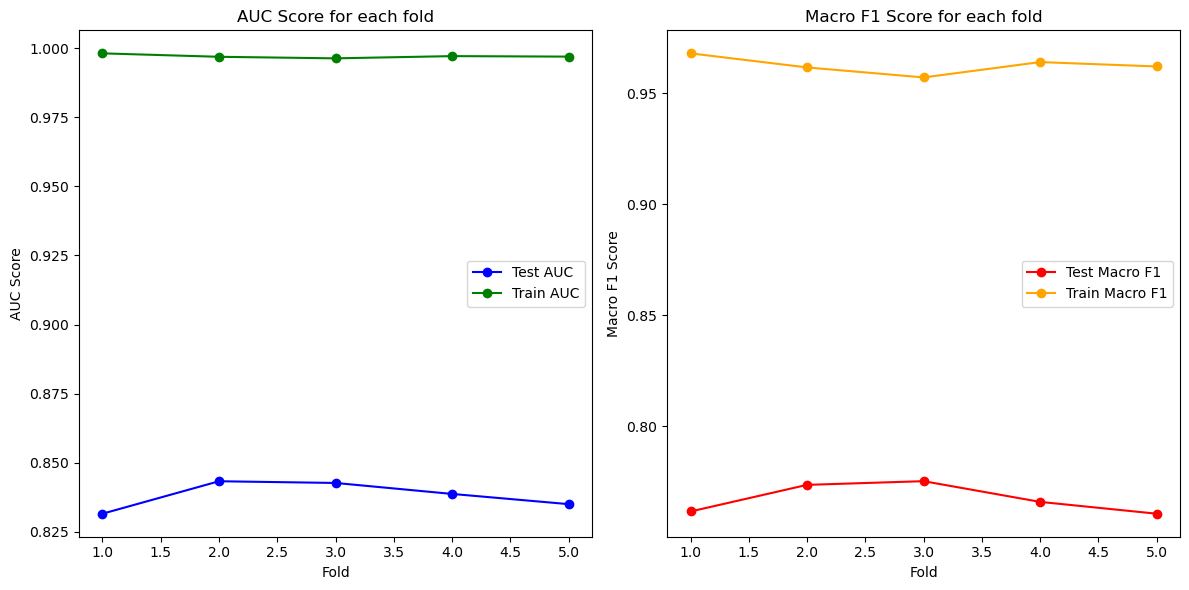

Mean Test AUC Score: 0.838277271562007
Mean Train AUC Score: 0.9970527031450166
Mean Test Macro F1 Score: 0.7674531444919326
Mean Train Macro F1 Score: 0.9625765245480405


In [13]:
# Convert X and y to numpy arrays if they are not already
if isinstance(X, (pd.DataFrame, pd.Series)):
    X = X.values
if isinstance(y, (pd.DataFrame, pd.Series)):
    y = y.values

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize XGBoost model
model = xgb.XGBClassifier()

# Arrays to store metrics for each fold
train_auc_scores = []
test_auc_scores = []
train_macro_f1_scores = []
test_macro_f1_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_train_pred_proba = model.predict_proba(X_train)[:, 1]
    y_test_pred = model.predict(X_test)
    y_test_pred_proba = model.predict_proba(X_test)[:, 1]
    
    train_auc_scores.append(roc_auc_score(y_train, y_train_pred_proba))
    test_auc_scores.append(roc_auc_score(y_test, y_test_pred_proba))
    train_macro_f1_scores.append(f1_score(y_train, y_train_pred, average='macro'))
    test_macro_f1_scores.append(f1_score(y_test, y_test_pred, average='macro'))

# Plotting the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(test_auc_scores) + 1), test_auc_scores, marker='o', linestyle='-', color='b', label='Test AUC')
plt.plot(range(1, len(train_auc_scores) + 1), train_auc_scores, marker='o', linestyle='-', color='g', label='Train AUC')
plt.title('AUC Score for each fold')
plt.xlabel('Fold')
plt.ylabel('AUC Score')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(test_macro_f1_scores) + 1), test_macro_f1_scores, marker='o', linestyle='-', color='r', label='Test Macro F1')
plt.plot(range(1, len(train_macro_f1_scores) + 1), train_macro_f1_scores, marker='o', linestyle='-', color='orange', label='Train Macro F1')
plt.title('Macro F1 Score for each fold')
plt.xlabel('Fold')
plt.ylabel('Macro F1 Score')
plt.legend()

plt.tight_layout()
plt.show()

print(f'Mean Test AUC Score: {np.mean(test_auc_scores)}')
print(f'Mean Train AUC Score: {np.mean(train_auc_scores)}')
print(f'Mean Test Macro F1 Score: {np.mean(test_macro_f1_scores)}')
print(f'Mean Train Macro F1 Score: {np.mean(train_macro_f1_scores)}')

In [14]:
X

array([[1637712003072.0, False, False, ..., 0.0, 0.0, 0.0],
       [1637712003072.0, False, False, ..., 0.0, 0.0, 0.0],
       [1637712003072.0, False, False, ..., 0.0, 0.0, 0.0],
       ...,
       [1638921535488.0, False, False, ..., 0.0, 0.0, 0.0],
       [1638921535488.0, False, False, ..., 0.0, 0.0, 0.0],
       [1638921535488.0, False, False, ..., 0.0, 0.0, 0.0]], dtype=object)

Group Kfold

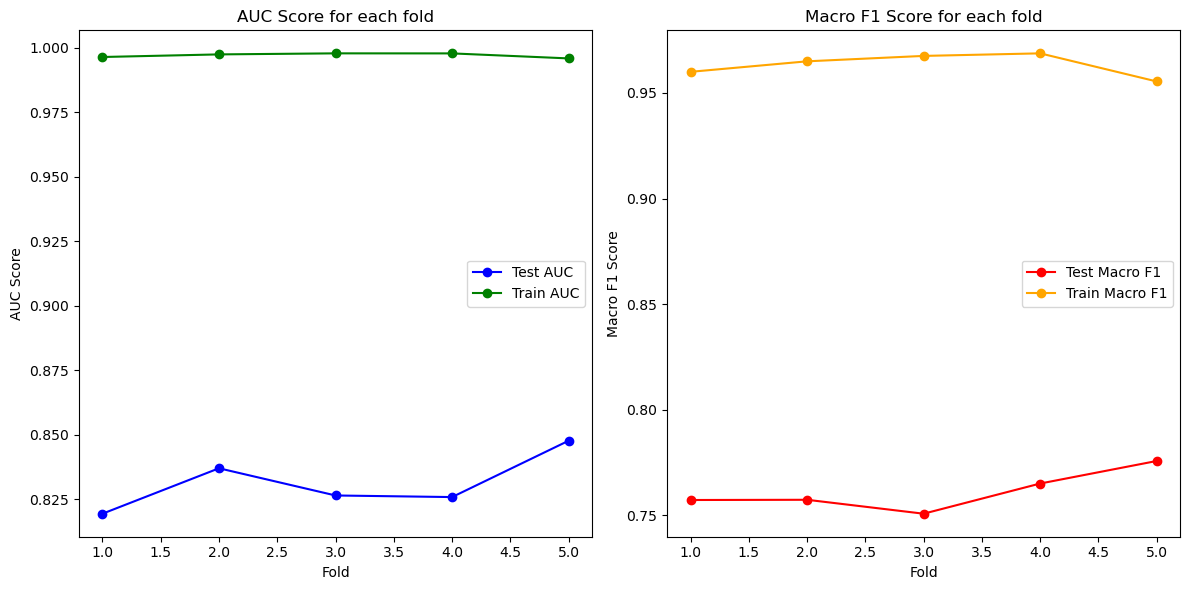

Mean Test AUC Score: 0.8313068193468369
Mean Train AUC Score: 0.997080022148158
Mean Test Macro F1 Score: 0.7611029868708243
Mean Train Macro F1 Score: 0.963372934031711


In [15]:
import os
import pickle
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import GroupKFold, cross_val_predict
from sklearn.metrics import roc_auc_score, f1_score


# Convert X and y to numpy arrays if they are not already
if isinstance(X, (pd.DataFrame, pd.Series)):
    X = X.values
if isinstance(y, (pd.DataFrame, pd.Series)):
    y = y.values

# Initialize GroupKFold
gkf = GroupKFold(n_splits=5)

# Initialize XGBoost model
model = xgb.XGBClassifier()

# Arrays to store metrics for each fold
train_auc_scores = []
test_auc_scores = []
train_macro_f1_scores = []
test_macro_f1_scores = []

for train_index, test_index in gkf.split(X, y, groups):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_train_pred_proba = model.predict_proba(X_train)[:, 1]
    y_test_pred = model.predict(X_test)
    y_test_pred_proba = model.predict_proba(X_test)[:, 1]
    
    train_auc_scores.append(roc_auc_score(y_train, y_train_pred_proba))
    test_auc_scores.append(roc_auc_score(y_test, y_test_pred_proba))
    train_macro_f1_scores.append(f1_score(y_train, y_train_pred, average='macro'))
    test_macro_f1_scores.append(f1_score(y_test, y_test_pred, average='macro'))

# Plotting the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(test_auc_scores) + 1), test_auc_scores, marker='o', linestyle='-', color='b', label='Test AUC')
plt.plot(range(1, len(train_auc_scores) + 1), train_auc_scores, marker='o', linestyle='-', color='g', label='Train AUC')
plt.title('AUC Score for each fold')
plt.xlabel('Fold')
plt.ylabel('AUC Score')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(test_macro_f1_scores) + 1), test_macro_f1_scores, marker='o', linestyle='-', color='r', label='Test Macro F1')
plt.plot(range(1, len(train_macro_f1_scores) + 1), train_macro_f1_scores, marker='o', linestyle='-', color='orange', label='Train Macro F1')
plt.title('Macro F1 Score for each fold')
plt.xlabel('Fold')
plt.ylabel('Macro F1 Score')
plt.legend()

plt.tight_layout()
plt.show()

print(f'Mean Test AUC Score: {np.mean(test_auc_scores)}')
print(f'Mean Train AUC Score: {np.mean(train_auc_scores)}')
print(f'Mean Test Macro F1 Score: {np.mean(test_macro_f1_scores)}')
print(f'Mean Train Macro F1 Score: {np.mean(train_macro_f1_scores)}')

In [ ]:
X

ESM LAbels

In [ ]:
p = os.path.join(PATH_INTERMEDIATE, 'stress_binary_personal-15min.pkl')
X, y, groups, t, datetimes = load(p)

In [ ]:
#Divide the features into different categories
feat_current = X.loc[:,[('#VAL' in str(x)) or ('ESM#LastLabel' in str(x)) for x in X.keys()]]  
feat_dsc = X.loc[:,[('#DSC' in str(x))  for x in X.keys()]]  
feat_yesterday = X.loc[:,[('Yesterday' in str(x))  for x in X.keys()]]  
feat_today = X.loc[:,[('Today' in str(x))  for x in X.keys()]]  
feat_sleep = X.loc[:,[('Sleep' in str(x))  for x in X.keys()]]  
feat_time = X.loc[:,[('Time' in str(x))  for x in X.keys()]]  
feat_pif = X.loc[:,[('PIF' in str(x))  for x in X.keys()]]  
feat_ImmediatePast = X.loc[:,[('ImmediatePast_15' in str(x))  for x in X.keys()]]
#Divide the time window features into sensor/past stress label
feat_current_sensor = X.loc[:,[('#VAL' in str(x))  for x in X.keys()]]  
feat_current_ESM = X.loc[:,[('ESM#LastLabel' in str(x)) for x in X.keys()]]  
feat_ImmediatePast_sensor = feat_ImmediatePast.loc[:,[('ESM' not in str(x)) for x in feat_ImmediatePast.keys()]]  
feat_ImmediatePast_ESM = feat_ImmediatePast.loc[:,[('ESM'  in str(x)) for x in feat_ImmediatePast.keys()]]  
feat_today_sensor = feat_today.loc[:,[('ESM' not in str(x))  for x in feat_today.keys()]]  
feat_today_ESM = feat_today.loc[:,[('ESM'  in str(x)) for x in feat_today.keys()]]  
feat_yesterday_sensor = feat_yesterday.loc[:,[('ESM' not in str(x)) for x in feat_yesterday.keys()]]  
feat_yesterday_ESM = feat_yesterday.loc[:,[('ESM'  in str(x)) for x in feat_yesterday.keys()]]

In [ ]:
feat_baseline = pd.concat([ feat_time,feat_dsc,feat_current_sensor, feat_ImmediatePast_sensor],axis=1)
feat_final = pd.concat([feat_baseline  ], axis=1)
# # Fill NaN values with zeros
feat_final = feat_final.fillna(0)
X = feat_final
cats = X.columns[X.dtypes == bool]

In [ ]:
import os
import pickle
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import roc_auc_score, f1_score


In [ ]:
# Convert X and y to numpy arrays if they are not already
if isinstance(X, (pd.DataFrame, pd.Series)):
    X = X.values
if isinstance(y, (pd.DataFrame, pd.Series)):
    y = y.values

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize XGBoost model
model = xgb.XGBClassifier()

# Arrays to store metrics for each fold
train_auc_scores = []
test_auc_scores = []
train_macro_f1_scores = []
test_macro_f1_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_train_pred_proba = model.predict_proba(X_train)[:, 1]
    y_test_pred = model.predict(X_test)
    y_test_pred_proba = model.predict_proba(X_test)[:, 1]
    
    train_auc_scores.append(roc_auc_score(y_train, y_train_pred_proba))
    test_auc_scores.append(roc_auc_score(y_test, y_test_pred_proba))
    train_macro_f1_scores.append(f1_score(y_train, y_train_pred, average='macro'))
    test_macro_f1_scores.append(f1_score(y_test, y_test_pred, average='macro'))

# Plotting the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(test_auc_scores) + 1), test_auc_scores, marker='o', linestyle='-', color='b', label='Test AUC')
plt.plot(range(1, len(train_auc_scores) + 1), train_auc_scores, marker='o', linestyle='-', color='g', label='Train AUC')
plt.title('AUC Score for each fold')
plt.xlabel('Fold')
plt.ylabel('AUC Score')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(test_macro_f1_scores) + 1), test_macro_f1_scores, marker='o', linestyle='-', color='r', label='Test Macro F1')
plt.plot(range(1, len(train_macro_f1_scores) + 1), train_macro_f1_scores, marker='o', linestyle='-', color='orange', label='Train Macro F1')
plt.title('Macro F1 Score for each fold')
plt.xlabel('Fold')
plt.ylabel('Macro F1 Score')
plt.legend()

plt.tight_layout()
plt.show()

print(f'Mean Test AUC Score: {np.mean(test_auc_scores)}')
print(f'Mean Train AUC Score: {np.mean(train_auc_scores)}')
print(f'Mean Test Macro F1 Score: {np.mean(test_macro_f1_scores)}')
print(f'Mean Train Macro F1 Score: {np.mean(train_macro_f1_scores)}')

In [ ]:
import os
import pickle
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import GroupKFold, cross_val_predict
from sklearn.metrics import roc_auc_score, f1_score


# Convert X and y to numpy arrays if they are not already
if isinstance(X, (pd.DataFrame, pd.Series)):
    X = X.values
if isinstance(y, (pd.DataFrame, pd.Series)):
    y = y.values

# Initialize GroupKFold
gkf = GroupKFold(n_splits=5)

# Initialize XGBoost model
model = xgb.XGBClassifier()

# Arrays to store metrics for each fold
train_auc_scores = []
test_auc_scores = []
train_macro_f1_scores = []
test_macro_f1_scores = []

for train_index, test_index in gkf.split(X, y, groups):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_train_pred_proba = model.predict_proba(X_train)[:, 1]
    y_test_pred = model.predict(X_test)
    y_test_pred_proba = model.predict_proba(X_test)[:, 1]
    
    train_auc_scores.append(roc_auc_score(y_train, y_train_pred_proba))
    test_auc_scores.append(roc_auc_score(y_test, y_test_pred_proba))
    train_macro_f1_scores.append(f1_score(y_train, y_train_pred, average='macro'))
    test_macro_f1_scores.append(f1_score(y_test, y_test_pred, average='macro'))

# Plotting the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(test_auc_scores) + 1), test_auc_scores, marker='o', linestyle='-', color='b', label='Test AUC')
plt.plot(range(1, len(train_auc_scores) + 1), train_auc_scores, marker='o', linestyle='-', color='g', label='Train AUC')
plt.title('AUC Score for each fold')
plt.xlabel('Fold')
plt.ylabel('AUC Score')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(test_macro_f1_scores) + 1), test_macro_f1_scores, marker='o', linestyle='-', color='r', label='Test Macro F1')
plt.plot(range(1, len(train_macro_f1_scores) + 1), train_macro_f1_scores, marker='o', linestyle='-', color='orange', label='Train Macro F1')
plt.title('Macro F1 Score for each fold')
plt.xlabel('Fold')
plt.ylabel('Macro F1 Score')
plt.legend()

plt.tight_layout()
plt.show()

print(f'Mean Test AUC Score: {np.mean(test_auc_scores)}')
print(f'Mean Train AUC Score: {np.mean(train_auc_scores)}')
print(f'Mean Test Macro F1 Score: {np.mean(test_macro_f1_scores)}')
print(f'Mean Train Macro F1 Score: {np.mean(train_macro_f1_scores)}')